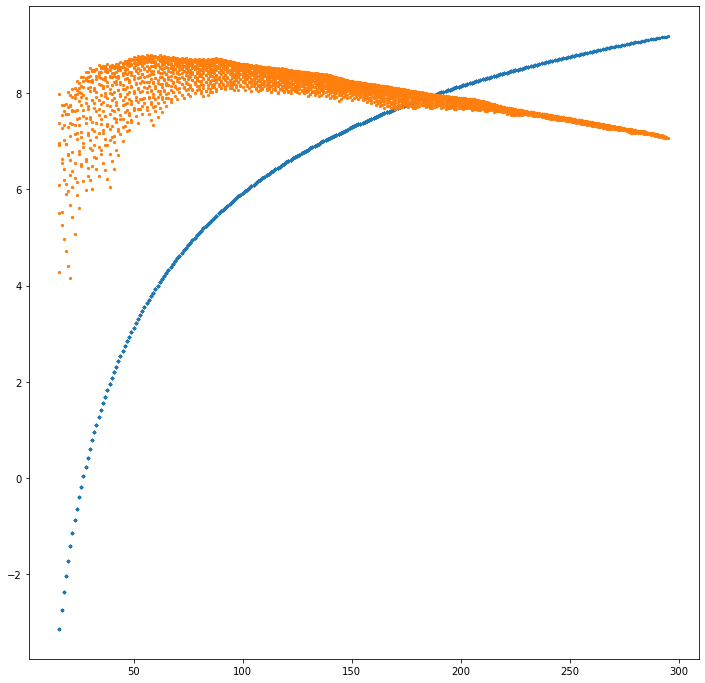

[16.7, -50.0, 0.0, 0.0, -50.0, 19.005]
Done
Time taken:  15.479328334000456
1024


In [17]:
#5D Chi-Squared Surface Thing

import numpy as np
import matplotlib.pyplot as plt
import time
import math

start = time.perf_counter()

measuredNuclearData = np.loadtxt("ZNBE.dat")

for i in measuredNuclearData:
    
    i[2] = i[2] * (i[0] + i[1]) 
    
#This makes measuredNuclearData elements be: [Z, N, BE] instead of BE/A

samples = 4

chiSqSurfaceData = [0, 0, 0, 0, 0, float('inf'), []]

AvField = np.linspace(50, 0, samples)
AsField = np.linspace(-50, 0, samples)
AcField = np.linspace(-50, 0, samples)
AaField = np.linspace(-50, 0, samples)
ApField = np.linspace(-50, 0, samples)

bestSEMF = []
bestChiSq = float('inf')
chiSqSurfaceData = []

for Av in AvField:
    Av = round(Av, 1)
    for As in AsField:
        As = round(As, 1)
        for Ac in AcField:
            Ac = round(Ac, 1)
            for Aa in AaField:
                Aa = round(Aa, 1)
                for Ap in ApField:
                    Ap = round(Ap, 1)
                        
                    chiSq = 0
                    SEMFData = []
                    realData = []

                    for i in measuredNuclearData:
                        
                        if i[0] + i[1] < 16:
                            continue
                        
                        Z = i[0]
                        N = i[1]                            
                        A = N + Z

                        vol = Av * A
                        sur = As * A**(2/3)
                        cou = Ac * (Z * (Z - 1)) * A**(-1/3)
                        asy = Aa * (N - Z)**2 * A**(-1)

                        if Z%2==0 and N%2==0:
                            pai = Ap * A**-0.5
                        elif Z%2!=0 and N%2!=0:
                            pai = -Ap * A**-0.5
                        else:
                            pai = 0

                        BE = vol + sur + cou + asy + pai
                        SEMFData.append([A, BE])
                        chiSq += (BE - i[2])**2

                    chiSqSurfaceData.append([Av, As, Ac, Aa, Ap, round(math.log(chiSq), 3)])
    
                    if chiSq < bestChiSq:
                        bestSEMF = SEMFData
                        bestChiSq = chiSq

maxChi = max([i[5] for i in chiSqSurfaceData])
    
np.savetxt('5DchiSqSurfaceTrainingDataUnrestricted.dat', chiSqSurfaceData)

chi = [chiSqSurfaceData[i][5] for i in range(len(chiSqSurfaceData))]
minChi = min(chi)
minIndex = chi.index(minChi)

realData = [([i[0]+i[1],i[2]]) for i in measuredNuclearData if (i[0] + i[1] >= 16)]

plt.figure(figsize=(12,12))

A = [i[0] for i in bestSEMF]
BE = [i[1]/i[0] for i in bestSEMF]

plt.scatter(A, BE, s=5)

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[minIndex][0:6])

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)

print(len(chiSqSurfaceData))

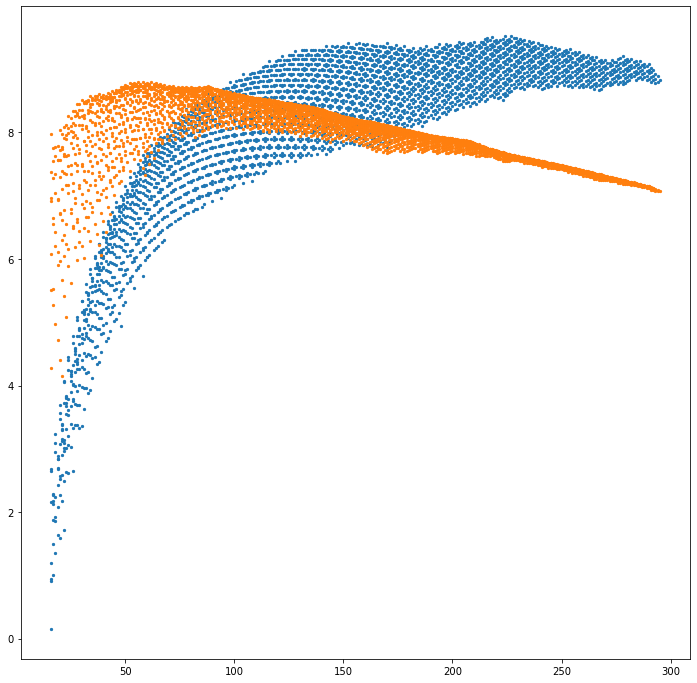

[20.7, -45.4, -0.7, -3.2, -49.3]
Done
Time taken:  15.907381975000135


In [18]:
start = time.perf_counter()

AvField = np.linspace(0, 50, 501)
AsField = np.linspace(-50, 0, 501)
AcField = np.linspace(-50, 0, 501)
AaField = np.linspace(-50, 0, 501)
ApField = np.linspace(-50, 0, 501)

number_of_points = 1000 # ~4 seconds per 10,000

bestSEMF = []
bestChiSq = float('inf')
chiSqSurfaceData = []

for i in range(number_of_points):
    
    chiSq = 0
    SEMFData = []
    
    Av = round(AvField[np.random.randint(0, 501)], 1)
    As = round(AsField[np.random.randint(0, 501)], 1)
    Ac = round(AcField[np.random.randint(0, 501)], 1)
    Aa = round(AaField[np.random.randint(0, 501)], 1)
    Ap = round(ApField[np.random.randint(0, 501)], 1)
    
    for i in measuredNuclearData:
        
        if i[0] + i[1] < 16:
            continue
        
        Z = i[0]
        N = i[1]
        A = N + Z

        vol = Av * A
        sur = As * A**(2/3)
        cou = Ac * (Z * (Z - 1)) * A**(-1/3)
        asy = Aa * (N - Z)**2 * A**(-1)

        if Z%2==0 and N%2==0:
            pai = Ap * A**-0.5
        elif Z%2!=0 and N%2!=0:
            pai = -Ap * A**-0.5
        else:
            pai = 0

        BE = vol + sur + cou + asy + pai

        SEMFData.append([A, BE])
        chiSq += (BE - i[2])**2
    
    chiSqSurfaceData.append([Av, As, Ac, Aa, Ap, round(math.log(chiSq), 3)])
    
    if chiSq < bestChiSq:
        bestSEMF = SEMFData
        bestChiSq = chiSq

maxChi = max([i[5] for i in chiSqSurfaceData])
    
np.savetxt('5DchiSqSurfaceTrainingDataUnrestricted.dat', chiSqSurfaceData)

chi = [chiSqSurfaceData[i][5] for i in range(len(chiSqSurfaceData))]
minChi = min(chi)
minIndex = chi.index(minChi)

realData = [([i[0]+i[1],i[2]]) for i in measuredNuclearData if (i[0] + i[1] >= 16)]

plt.figure(figsize=(12,12))

A = [i[0] for i in bestSEMF]
BE = [i[1]/i[0] for i in bestSEMF]

plt.scatter(A, BE, s=5)

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[minIndex][0:5])

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)

In [19]:
print(chiSqSurfaceData[minIndex][0:6])

[20.7, -45.4, -0.7, -3.2, -49.3, 18.742]
